In [3]:
%matplotlib notebook
import matplotlib.pyplot as plt
import math

In [4]:
def calculate_power(x, y, serial):
    # coord system starts from 1
    x_coord = x+1
    y_coord = y+1
    # get power
    rackID = x_coord+10
    power = rackID * y_coord
    power += serial
    power = power * rackID
    digits = str(int(power))
    # no hundreds
    if len(digits) <= 2:
        power = 0
    else:
        power = int(digits[-3])
    # power lvl
    power -= 5
    return power

In [5]:
def get_fuel_cell_power(width, height, serial, func=calculate_power):
    grid = [[0 for _ in range(width)] for _ in range(height)]
    for x in range(width):
        for y in range(height):
            power = func(x, y, serial)
            grid[y][x] = power      
    return grid

In [6]:
# get sum of n*m kernel of the matrix
def get_kernel(grid, n, m):
    def get_sum(x, y):
        sum = 0
        for n_ in range(n):
            for m_ in range(m):
                 sum += grid[y+m_][x+n_]
        return sum
    
    height = len(grid)
    width = len(grid[0])
    kernel = [[0 for _ in range(width-n+1)] for _ in range(height-m+1)]    
    
    for x in range(width-n+1):
        for y in range(height-m+1):
            kernel[y][x] = get_sum(x, y)
    return kernel

In [38]:
def get_max_kernel(kernel):
    height = len(kernel)
    width = len(kernel[0])
    max_kernel = (0, 0)
    max_power = -math.inf
    for x in range(width):
        for y in range(height):
            power = kernel[y][x]
            if power > max_power:
                max_power = power
                max_kernel = (x, y)
    return (max_kernel, max_power)

In [49]:
SERIAL = 6303
power_levels = get_fuel_cell_power(300, 300, SERIAL)
kernel_3 = get_kernel(power_levels, 3, 3)
(x, y), max_power = get_max_kernel(kernel_3)

In [50]:
print('3x3 area: {},{},{}'.format(x+1, y+1, max_power))

3x3 area: 243,27,30


<IPython.core.display.Javascript object>


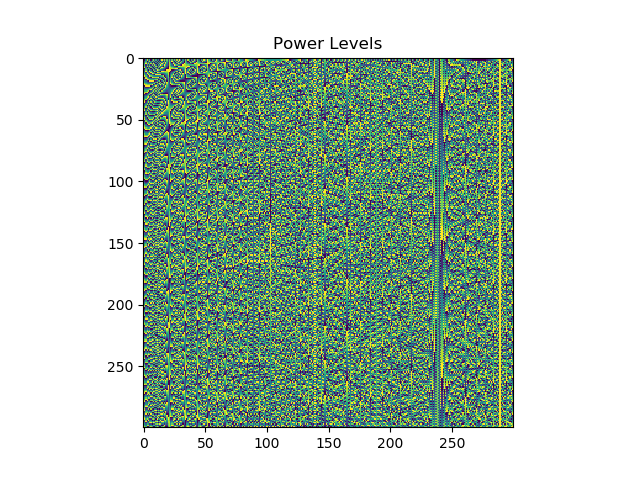

In [10]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_title('Power Levels')
ax.imshow(power_levels)

<IPython.core.display.Javascript object>


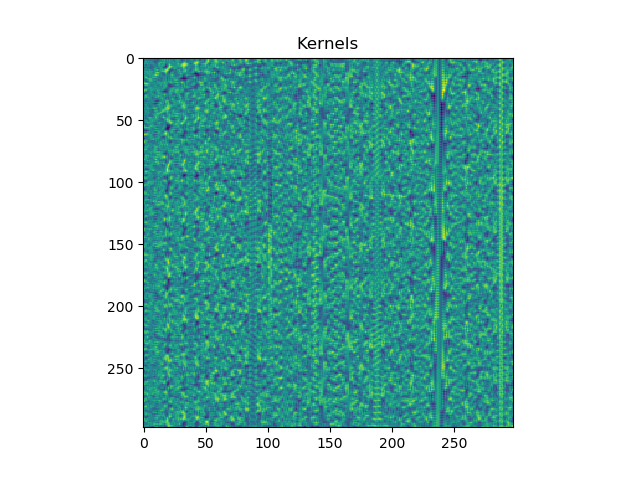

In [32]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_title('Kernels')
ax.imshow(kernel_3)

## Part 2
Get the max kernel of any size

In [71]:
# implement a recursive kernel cache
# power levels is a 1x1 kernel
def get_kernel_cached(base_kernel, start=1, end=None, cache={}):
    height = len(base_kernel)
    width = len(base_kernel[0])
    # get highest denominator for the kernel
    def get_highest_divisor(n):
        for i in range(n-1, 0, -1):
            if n % i == 0:
                return i
        return 1
    # fetch kernel recursively
    # larger kernels will be calculated from smaller kernels
    # which fit into the dimensions of the larger kernel
    def recursive_kernel_fetch(size):
        if size in cache:
            return cache[size]
        print('Calculating {}'.format(size))
        # calculate kernel
        kernel_width = width-size+1
        kernel_height = height-size+1
        kernel = [[0 for _ in range(kernel_width)] for _ in range(kernel_height)]
        # get kernels highest divisor
        sub_size = get_highest_divisor(size)
        # if prime, get it as sum of (n-1) and 1
        if sub_size == 1:
            sub_size = size-1
            sub_kernel = recursive_kernel_fetch(sub_size)
            # go through sub kernel
            for x in range(kernel_width):
                for y in range(kernel_height):
                    sum = 0
                    sum += sub_kernel[y][x] # sub of (n-1) area
                    for x_off in range(size):
                        sum += base_kernel[y+size-1][x+x_off]
                    for y_off in range(size-1):
                        sum += base_kernel[y+y_off][x+size-1]
                    kernel[y][x] = sum
        # if not prime, divisible into even subsections
        else:
            sub_kernel = recursive_kernel_fetch(sub_size)
            # go through sub kernel
            for x in range(kernel_width):
                for y in range(kernel_height):
                    # look into sub kernel
                    sum = 0
                    for x_off in range(0, size, sub_size):
                        for y_off in range(0, size, sub_size):
                             sum += sub_kernel[y+y_off][x+x_off]
                    kernel[y][x] = sum
        # store in cache
        cache[size] = kernel
        return kernel
    
    if end is None:
        end = len(base_kernel)
    cache[start] = base_kernel
    for size in range(start+1, end):
        recursive_kernel_fetch(size)
        
    return cache

In [58]:
def check_kernels(a, b):
    height = len(a)
    width = len(a[0])
    for x in range(width):
        for y in range(height):
            if a[y][x] != b[y][x]:
                raise ValueError('Not same @ {},{}: a={}, b={}'
                                 .format(x, y, a[y][x], b[y][x]))

In [59]:
kernels = get_kernel_cached(power_levels, 1, 300)

Calculating 2
Calculating 3
Calculating 4
Calculating 5
Calculating 6
Calculating 7
Calculating 8
Calculating 9
Calculating 10
Calculating 11
Calculating 12
Calculating 13
Calculating 14
Calculating 15
Calculating 16
Calculating 17
Calculating 18
Calculating 19
Calculating 20
Calculating 21
Calculating 22
Calculating 23
Calculating 24
Calculating 25
Calculating 26
Calculating 27
Calculating 28
Calculating 29
Calculating 30
Calculating 31
Calculating 32
Calculating 33
Calculating 34
Calculating 35
Calculating 36
Calculating 37
Calculating 38
Calculating 39
Calculating 40
Calculating 41
Calculating 42
Calculating 43
Calculating 44
Calculating 45
Calculating 46
Calculating 47
Calculating 48
Calculating 49
Calculating 50
Calculating 51
Calculating 52
Calculating 53
Calculating 54
Calculating 55
Calculating 56
Calculating 57
Calculating 58
Calculating 59
Calculating 60
Calculating 61
Calculating 62
Calculating 63
Calculating 64
Calculating 65
Calculating 66
Calculating 67
Calculating 68
Cal

In [67]:
check_kernels(get_kernel(power_levels, 11, 11), kernels[11])

In [85]:
kernels_max = {}
for size, kernel in kernels.items():
    (x, y), max_power = get_max_kernel(kernel)
    kernels_max[size] = ((x, y), max_power)

<IPython.core.display.Javascript object>


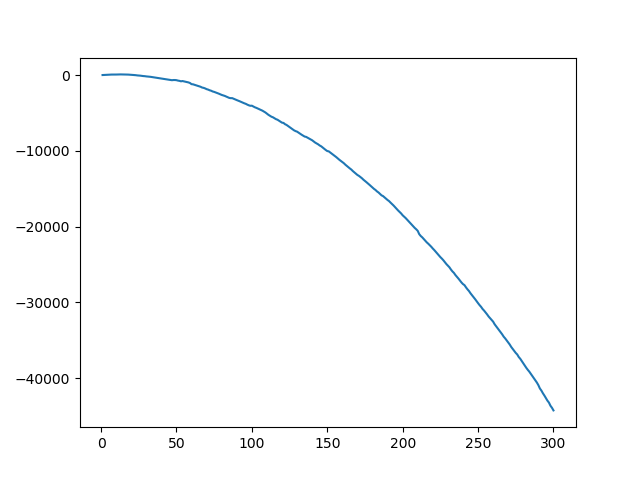

In [88]:
values = [0] * 300
for size, ((x, y), max_power) in kernels_max.items():
    values[size-1] = max_power
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot([i+1 for i in range(300)], values)

In [90]:
size, ((x, y), max_power) = max(kernels_max.items(), key=lambda x: x[1][1])

In [91]:
print('{},{},{} with power: {}'.format(x+1, y+1, size, max_power))

284,172,12 with power: 88
